# Problem
A worldwide e-commerce site has Spanish translated versions. A data scientist noticed that Spain-based user has higher conversion rate than other Spanish-speaking user. Spain and LatAm (Latin America) suggest that it could be Spainish tranlation. All Spainish-speaking countries had the same translation of the website which is written by Spainard. Therefore, they agree to try the test that all the Spainish-speaking countries has its own translation written by local. Which means Mexico user will see the translation written by Mexican, Colombia user will see the translation written by Colombian and etc.
After we run the test, we found the result is suprising that the test is negative.

## Hypothesis:
Having Spainish-speaking countries translation localization will increase the conversion rate.

## Metric:
Use conversion rate as the Metric to test our hypothesis

## Experiment
Randomly divide user from different contries equally into two group, one for control which is user accessed the Spainard written website, one for test which is user accessed tranlation localized website. We want to see whether test group has higher conversion rate than control group or not.

## Q:
You are asked to:

Confirm that test is actually negative. I.e., the old version of the site with just one translation across Spain and LatAm performs better

Explain why that might be happening. Are the localized translations really worse?

If you identified what was wrong, design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and results can be trusted.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

%matplotlib inline

# Load Dataset

In [2]:
test=pd.read_csv('test_table.csv')
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,12/3/2015,Direct,Web,ES,NaN,IE,1,0
1,497851,12/4/2015,Ads,Web,ES,Google,IE,0,1
2,848402,12/4/2015,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,12/3/2015,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,11/30/2015,Ads,Web,ES,Google,FireFox,0,1


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [4]:
user=pd.read_csv('user_table.csv')
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [5]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
user_id    452867 non-null int64
sex        452867 non-null object
age        452867 non-null int64
country    452867 non-null object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [6]:
data = test.merge(user,how='left',on='user_id')
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,12/3/2015,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,12/4/2015,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,12/4/2015,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,12/3/2015,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,11/30/2015,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
sex                 452867 non-null object
age                 452867 non-null float64
country             452867 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 45.0+ MB


In [8]:
(data.groupby('date').count()['user_id']).mean()

90664.2

# Data Visualization
The plot below shows test and control group distribution under different categories: source, device, browser_language, ads_channel, browser and sex. We could see that test and control group are evenly distributed under these categories.

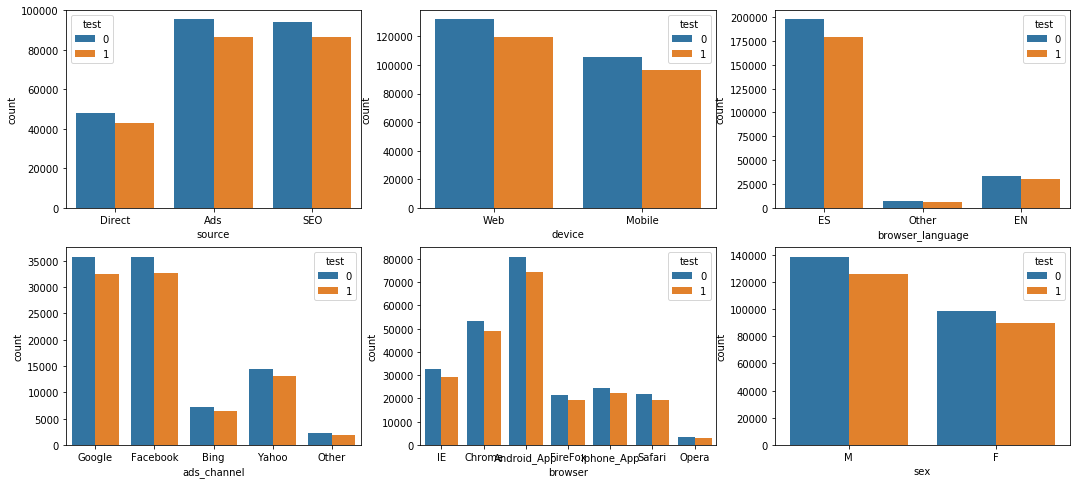

In [10]:
fig, ax = plt.subplots(2,3, figsize=(18, 8))
sns.countplot(x='source', hue='test', data=data, ax=ax[0][0])
sns.countplot(x='device', hue='test', data=data, ax=ax[0][1])
sns.countplot(x='browser_language', hue='test', data=data, ax=ax[0][2])
sns.countplot(x='ads_channel', hue='test', data=data, ax=ax[1][0])
sns.countplot(x='browser', hue='test', data=data, ax=ax[1][1])
sns.countplot(x='sex', hue='test', data=data, ax=ax[1][2])

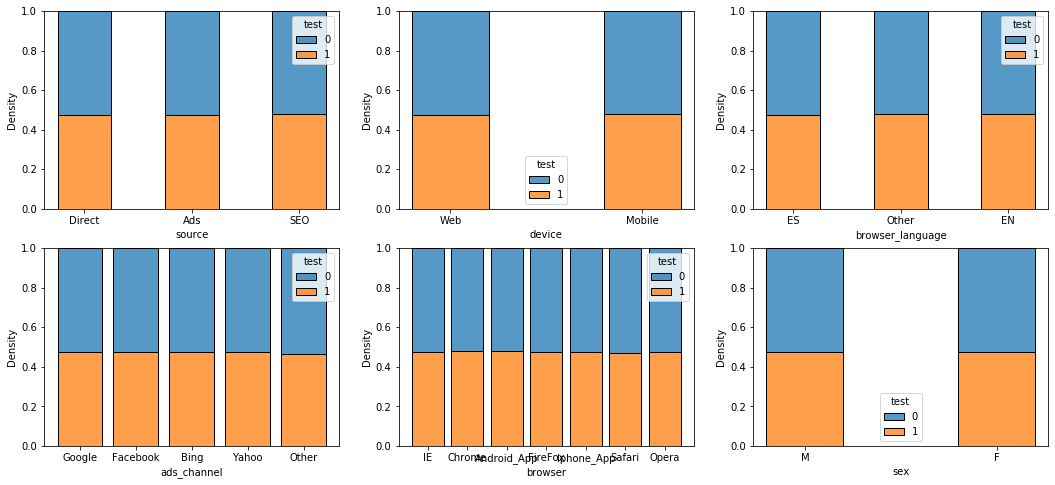

In [11]:
fig, ax = plt.subplots(2,3, figsize=(18, 8))
sns.histplot(x='source', hue='test', data=data, stat='density', multiple='fill', shrink=.5, ax=ax[0][0])
sns.histplot(x='device', hue='test', data=data, stat='density', multiple='fill', shrink=.4, ax=ax[0][1])
sns.histplot(x='browser_language', hue='test', data=data, stat='density', multiple='fill', shrink=.5, ax=ax[0][2])
sns.histplot(x='ads_channel', hue='test', data=data.dropna(subset=['ads_channel']), stat='density', multiple='fill', shrink=.8, ax=ax[1][0])
sns.histplot(x='browser', hue='test', data=data, stat='density', multiple='fill', shrink=.8, ax=ax[1][1])
sns.histplot(x='sex', hue='test', data=data.dropna(subset=['sex']), stat='density', multiple='fill', shrink=.4, ax=ax[1][2])

Check what value each column has.

In [12]:
for c in data.columns:
    print(str(c)+str(data[c].unique()))

user_id[315281 497851 848402 ... 514870 785224 241662]
date['12/3/2015' '12/4/2015' '11/30/2015' '12/1/2015' '12/2/2015']
source['Direct' 'Ads' 'SEO']
device['Web' 'Mobile']
browser_language['ES' 'Other' 'EN']
ads_channel[nan 'Google' 'Facebook' 'Bing' 'Yahoo' 'Other']
browser['IE' 'Chrome' 'Android_App' 'FireFox' 'Iphone_App' 'Safari' 'Opera']
conversion[1 0]
test[0 1]
sex['M' 'F' nan]
age[32. 21. 34. 22. 19. 35. 31. 33. 37. 29. 28. 27. 39. 24. 20. 45. 23. 26.
 18. 25. 48. 40. 46. 30. 38. 42. 36. 43. 44. 41. 47. 51. 50. nan 49. 53.
 56. 55. 52. 59. 70. 54. 60. 57. 62. 63. 58. 61. 68. 64. 65. 67. 66.]
country['Spain' 'Mexico' 'Venezuela' 'Bolivia' 'Colombia' 'Uruguay' 'El Salvador'
 'Nicaragua' 'Peru' 'Costa Rica' 'Chile' 'Argentina' 'Ecuador' 'Guatemala'
 'Honduras' 'Paraguay' 'Panama' nan]


The plot below shows test and control group distribution under different countries. We can see that sample sizes generally seem to be balanced in all countries except Argentina and Uruguay.

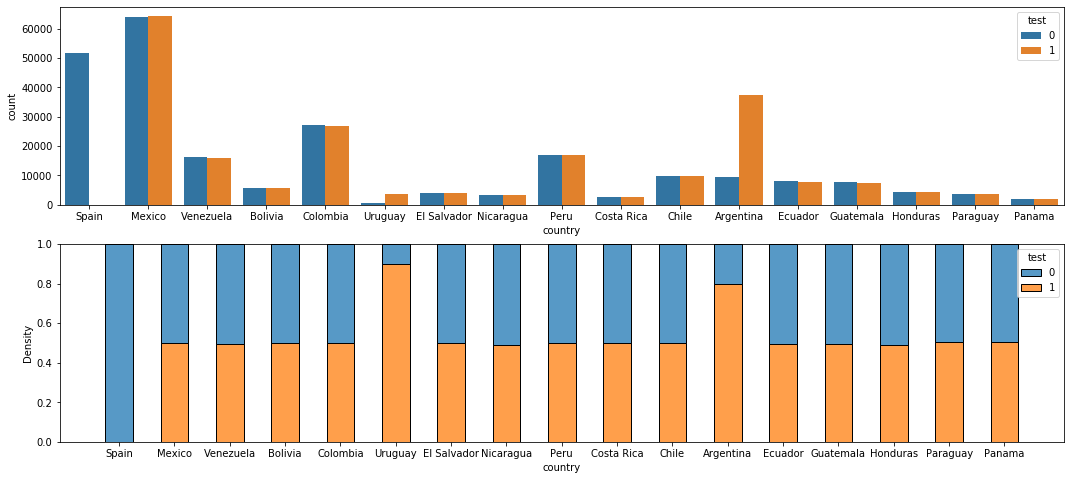

In [13]:
fig, ax = plt.subplots(2,1, figsize=(18, 8))
sns.countplot(x='country', hue='test', data=data, ax=ax[0])
sns.histplot(x='country', hue='test', data=data.dropna(subset=['country']), stat='density', multiple='fill', shrink=0.5, ax=ax[1])


The plot below shows test and control group distribution under different ages. We can see that the age of users is mainly in 18-50. And sample sizes is generally balanced

In [33]:
# data_age = 
data[['age', 'test']]

,age,test
0,32.0,0
1,21.0,1
2,34.0,0
3,22.0,1
4,19.0,1
...,...,...
453316,50.0,0
453317,20.0,1
453318,25.0,0
453319,21.0,1


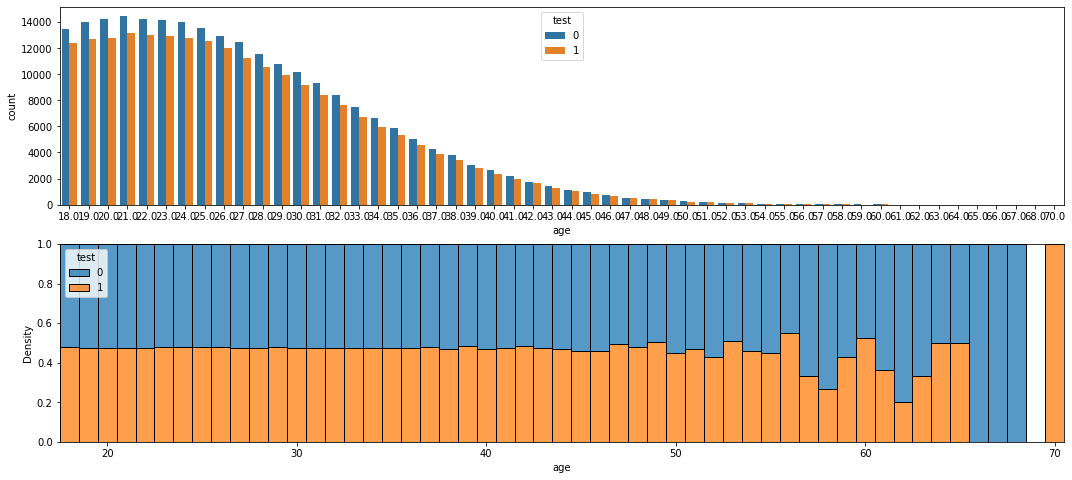

In [14]:
fig, ax = plt.subplots(2,1, figsize=(18, 8))
sns.countplot(x='age', hue='test', data=data, ax=ax[0])
sns.histplot(x='age', hue='test', data=data, stat='density', multiple='fill', discrete= True, ax=ax[1])


In [32]:
data[data['age']==67]

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
177460,345412,12/3/2015,Direct,Web,ES,NaN,Safari,0,0,F,67.0,Spain


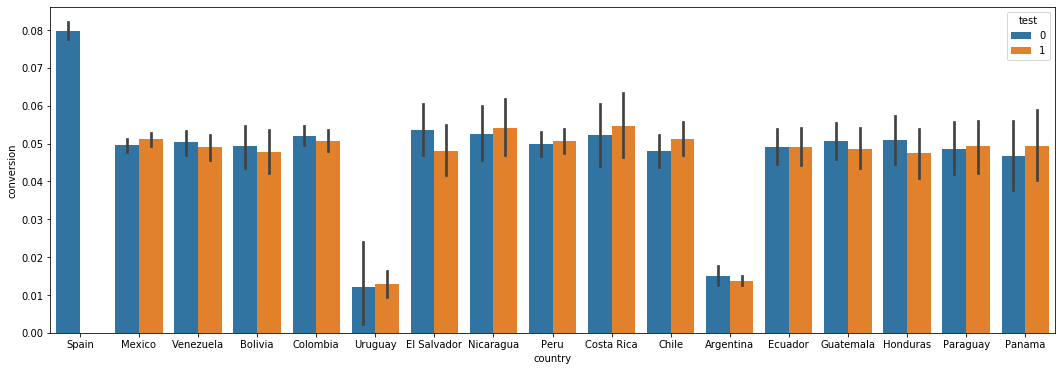

In [16]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='country', y='conversion', hue='test', data=data, ax=ax)

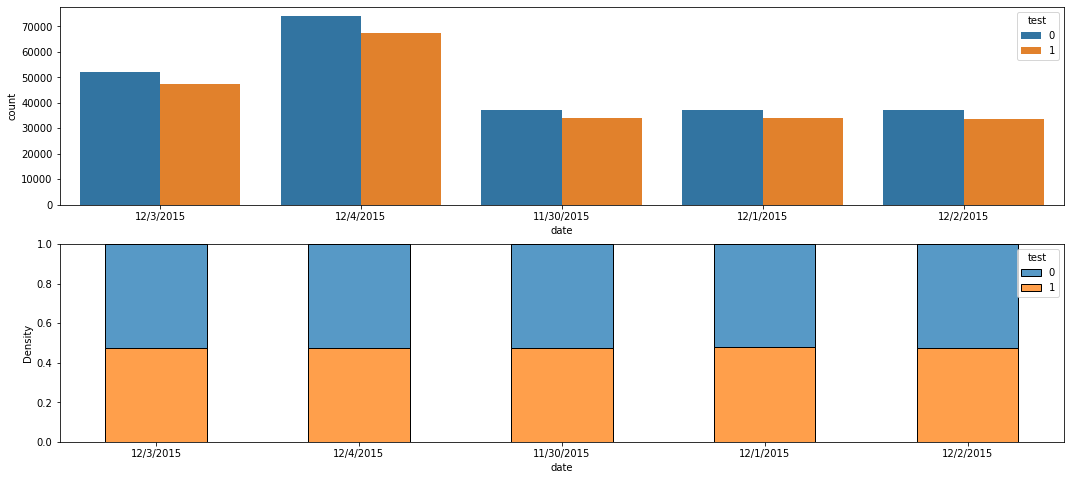

In [17]:
fig, ax = plt.subplots(2,1, figsize=(18, 8))
sns.countplot(x='date', hue='test', data=data, ax=ax[0])
sns.histplot(x='date', hue='test', data=data.dropna(subset=['country']), stat='density', multiple='fill', shrink=0.5, ax=ax[1])


In [18]:
test_data = data[data['country'] != 'Spain']
cont_val = test_data[test_data['test'] == 0]['conversion'].values
test_val = test_data[test_data['test'] == 1]['conversion'].values
cont_val.mean(),test_val.mean()

(0.04833042316066309, 0.043424713982118966)

In [19]:
ttest_ind(cont_val, test_val, equal_var=False)

Ttest_indResult(statistic=7.3939374121344805, pvalue=1.4282994754055316e-13)

From the mean conversion rate for test and control group and low p-value, it seems like the new version is even worse than old one. But control and test sample sizes generally seem to be balanced in all countries except Argentina and Uruguay. How much does data from these countries represent of the whole dataset?

In [20]:
print(str(round((len(data[data['country'] == 'Uruguay'])+len(data[data['country'] == 'Argentina']))/len(data)*100,2))+'%')

11.22%


11% of a huge dataset can contain many conversions in one group or the other, biasing our results. Also, the dataset still contains visitors from Spain, which only applies as a control group. Based on this, observations from these 3 countries will be removed to rule out any bias that may invalidate our results. After that, we will visualize how conversions really look like for control and test groups:

In [21]:
unbias_data = data[(data['country'] != 'Uruguay') & (data['country'] != 'Argentina') & (data['country'] != 'Spain')]
unbias_data.country.unique()

array(['Mexico', 'Venezuela', 'Bolivia', 'Colombia', 'El Salvador',
       'Nicaragua', 'Peru', 'Costa Rica', 'Chile', 'Ecuador', 'Guatemala',
       'Honduras', 'Paraguay', 'Panama', nan], dtype=object)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


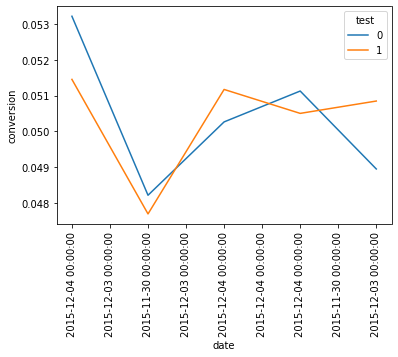

In [22]:
unbias_data["date"] = pd.to_datetime(unbias_data["date"], infer_datetime_format=True)
line=sns.lineplot(data=unbias_data, x='date', y='conversion', hue='test', ci=None)
line.set_xticklabels(unbias_data.date, rotation=90)
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


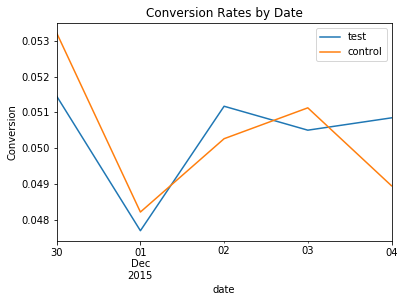

In [23]:
unbias_data["date"] = pd.to_datetime(unbias_data["date"], infer_datetime_format=True)

# Plot our dataframe
fig = unbias_data[unbias_data.test==1][
    ['date', 'conversion']].groupby('date').mean().plot()
unbias_data[unbias_data.test==0][
    ['date', 'conversion']].groupby('date').mean().plot(ax=fig)
plt.legend(['test','control'])
plt.title('Conversion Rates by Date')
plt.ylabel("Conversion")
plt.show()

Having removed the unbalanced data and visualized the rest by date, we could see the conversion
Having removed imbalanced observations and visualized the rest, we can notice that conversions generally move in the same direction in time, with increasing conversions for both groups starting after December 1st and fluctuating after that. Conversions for the test group on December 2nd and 4th give hope that there may be significant difference in the website's performance in bringing in conversion.

In [24]:
cont_val = unbias_data[unbias_data['test'] == 0]['conversion'].values
test_val = unbias_data[unbias_data['test'] == 1]['conversion'].values
cont_val.mean(),test_val.mean()

(0.05018630713655887, 0.05042112907191501)

In [25]:
ttest_ind(cont_val, test_val, equal_var=False)

Ttest_indResult(statistic=-0.31809948911634467, pvalue=0.750409660579713)

In [26]:
df=pd.DataFrame(columns=['Country', 'Control Rate', 'Test Rate', 'P-Value'])
df['Country'] = unbias_data['country'].dropna().unique()
for country in df['Country']:
    cont_v = unbias_data[(unbias_data['test'] == 0) & (unbias_data['country'] == country)]['conversion'].values
    test_v = unbias_data[(unbias_data['test'] == 1) & (unbias_data['country'] == country)]['conversion'].values

    df.loc[df[df['Country'] == country].index, 'Control Rate'] = cont_v.mean()
    df.loc[df[df['Country'] == country].index, 'Test Rate'] = test_v.mean()
    df.loc[df[df['Country'] == country].index, 'P-Value'] = ttest_ind(cont_v, test_v, equal_var=False).pvalue
df    

,Country,Control Rate,Test Rate,P-Value
0,Mexico,0.0494946,0.0511863,0.165544
1,Venezuela,0.0503437,0.0489783,0.573702
2,Bolivia,0.0493694,0.047901,0.718885
3,Colombia,0.0520895,0.050571,0.423719
4,El Salvador,0.053554,0.0479469,0.248127
5,Nicaragua,0.052647,0.0541768,0.7804
6,Peru,0.049914,0.0506043,0.771953
7,Costa Rica,0.0522556,0.0547376,0.687876
8,Chile,0.0481072,0.051295,0.302848
9,Ecuador,0.0491538,0.0489884,0.961512


After controlling for country, the test clearly appears non significant with p-value> 0.05 threshold.

In conclusion, given the fact of bias selection, we cannot give the conclusion about the difference between control and test group. This means that as far as the results of our test, the groups show no difference, and we cannot reject the null hypothesis, so that a localized translation did not make things worse as the team concluded.

In [27]:
from statsmodels.stats.power import zt_ind_solve_power
from statsmodels.stats.proportion import proportion_effectsize as es
 
zt_ind_solve_power(effect_size=es(prop1=cont_val.mean(), prop2=test_val.mean()), alpha=0.05, power=0.8, alternative="two-sided")
#https://stats.stackexchange.com/questions/392979/ab-test-sample-size-calculation-by-hand
#https://github.com/Alsukhon/Spanish-Translation/blob/master/AB%20testing%20-%20Spanish%20translation.ipynb
#def sample_power_probtest(p1, p2, power=0.8, sig=0.05):
#     z = stats.norm.isf([sig/2]) #two-sided t test
#     zp = -1 * stats.norm.isf([power]) 
#     d = (p1-p2)
#     s =2*((p1+p2) /2)*(1-((p1+p2) /2))
#     n = s * ((zp + z)**2) / (d**2)
#     return int(round(n[0]))

# p1 = unbias_data[unbias_data['test']==1]['conversion'].mean()
# p2 = unbias_data[unbias_data['test']==0]['conversion'].mean()
# sample_power_probtest(p1, p2)

13600144.79235344

In [28]:
len(unbias_data)

350672

This number is much higher than the sample size we have. This says that we do need to conduct another experiment that lasts at least about 5 months to get a meaningful result out of the analysis. However, for our current website needs we will carry on with our analysis to infer what we can about this experiment.

In [29]:
test_diff = []
ctrl_diff = []

# Subtract control & test sample sizes and get the maximum difference we accepted:
for country in df['Country']:
    control = len(unbias_data[(unbias_data['test'] == 0) & (unbias_data['country'] == country)]) 
    test = len(unbias_data[(unbias_data['test'] == 1) & (unbias_data['country'] == country)])
    c_diff = round(abs(test-control)/control*100,1)
    t_diff = round(abs(test-control)/test*100,1)
    ctrl_diff.append(c_diff)
    test_diff.append(t_diff)
        
print ('Max difference for control: '+str(max(ctrl_diff))+'%')
print ('Max difference for test: '+str(max(test_diff))+'%')

Max difference for control: 3.5%
Max difference for test: 3.7%



# Recommendation
Since our sample size is clearly too small to produce a significant result, we recommend the following to obtain a sample with a size that produces statistically significant result:

1. Employing a randomization technique with the next experiment where the maximum difference between control and treatment groups for each country is not more than 3.7% for any of them.

2. Based on the number of daily visitors, replicating the same experiment on a period of no less than 5 months to obtain a sample size that we can reliably test.

3. If possible, instantly introducing local translation at a small scale where cost is feasible to prepare for the larger experiment and anticipate any systematic issues.

In [30]:
# from scipy import stats
# t=[0,1,2,3,4]
# n=[2,3,4,5,6]
# df=pd.DataFrame(columns=[0,1,2,3,4],index=[[2,3,4,5,6]])
# #mean!=0
# for tt in t:
#     for nn in n:
#         pval=stats.t.sf(np.abs(tt), nn-1)*2
#         df.loc[nn,tt]=pval
# df
# #mean>0
# for tt in t:
#     for nn in n:
#         pval=stats.t.sf(np.abs(tt), nn-1)
#         df.loc[nn,tt]=pval
# df    